In [161]:
#primero importamos librerias necesarias
import pandas as pd
import numpy as np
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
###
import seaborn as sb

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Agregado por el profesor

## Se procesa el archivo 1

In [56]:
#primer dataset, correspondiende al crecimiento de población de distintos paises, por año
df1 = pd.read_csv("Datasets/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv") 

In [57]:
# Setea el máximo de lineas a mostrar
pd.set_option('display.max_rows', 1000)

In [58]:
df_melt = pd.melt(df1, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])
df_melt.head(3)
df_melt.describe(include='all')


,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
count,16104,16104,16104,16104,16104,15407.000000
unique,264,264,1,1,61,NaN
top,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1960,NaN
freq,61,61,16104,16104,264,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.779473
std,NaN,NaN,NaN,NaN,NaN,1.559389
min,NaN,NaN,NaN,NaN,NaN,-10.955149
25%,NaN,NaN,NaN,NaN,NaN,0.779336
50%,NaN,NaN,NaN,NaN,NaN,1.750733
75%,NaN,NaN,NaN,NaN,NaN,2.631154


In [59]:
len(df_melt['Country Name'].unique())
# Se pueden ver que hay 264 paises

264

In [60]:
df_melt.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'variable', 'value'],
      dtype='object')

In [61]:
df_melt.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
variable            0
value             697
dtype: int64

In [62]:
df_nulls = df_melt.loc[df_melt['value'].isna(),:]
df_count_by_year = df_nulls[['variable','Country Name']].groupby(['variable'], as_index=False).count()

df_count_by_year.loc[df_count_by_year['Country Name']==264,:]
# Se puede ver que a todos los paises les falta el año 1960 y 2020 por lo tanto eliminan esas filas

,variable,Country Name
0,1960,264
60,2020,264


In [63]:
#df_nulls[['Country Name','variable']].groupby(['Country Name'], as_index=False).count()

In [64]:
df_clean = df_melt.drop(df_melt[df_melt['variable'].isin(['1960','2020'])].index)
df_clean

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
264,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1961,2.238144
265,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1961,1.898476
266,Angola,AGO,Population growth (annual %),SP.POP.GROW,1961,1.393363
267,Albania,ALB,Population growth (annual %),SP.POP.GROW,1961,3.120855
268,Andorra,AND,Population growth (annual %),SP.POP.GROW,1961,6.941532
...,...,...,...,...,...,...
15835,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,2019,-0.157992
15836,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,2019,2.300580
15837,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,2019,1.338617
15838,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,2019,2.892373


In [65]:
# Para el resto de los valores una buena estrategía puede ser completar el crecimiento con los valores de la media para cada país
def impute_grow(cols):
    grow=cols[5]
    county = cols[0]
    if pd.isnull(grow):
        # Si es null se retorna la media para el pais
        return df_clean.loc[df_clean['Country Name']==county,:]['value'].mean()
    else:
        # Si no es null se retorna el valor que tiene la columna
        return grow

In [66]:
# Aplicamos la funcion
df_clean['value'] = df_clean.apply(impute_grow,axis=1)
df_clean.isnull().sum()
# Se ven que siguen habiendo valores nulos

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
variable           0
value             59
dtype: int64

In [67]:
# Se listan los nulos y se ve que son de un valor de pais que 'Not classified', se borran dichos valores
df_clean.loc[df_clean['value'].isna(),:].head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
372,Not classified,INX,Population growth (annual %),SP.POP.GROW,1961,NaN
636,Not classified,INX,Population growth (annual %),SP.POP.GROW,1962,NaN
900,Not classified,INX,Population growth (annual %),SP.POP.GROW,1963,NaN


In [68]:
df_clean = df_clean.drop(df_clean[df_clean['Country Name']=='Not classified'].index)
df_clean.isnull().sum()
# Se vuelven a contar los nulos y ahora si quedó sin nulos

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
variable          0
value             0
dtype: int64

In [69]:
# Se analiza la columna 'Indicator Code' para ver si tiene otro valor que indique si decrece
# Solo tiene grow
df_clean['Indicator Code'].unique()

array(['SP.POP.GROW'], dtype=object)

## Se procesa el archivo 2

In [70]:
# Realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN


In [71]:
df2_melt = pd.melt(df2, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])

In [72]:
df2_melt.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
count,16492,16492,16492,16492,16492,12128.000000
unique,266,266,1,1,62,NaN
top,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
freq,62,62,16492,16492,266,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.686121
std,NaN,NaN,NaN,NaN,NaN,5.855128
min,NaN,NaN,NaN,NaN,NaN,-64.047107
25%,NaN,NaN,NaN,NaN,NaN,1.445700
50%,NaN,NaN,NaN,NaN,NaN,3.814080
75%,NaN,NaN,NaN,NaN,NaN,6.100000


In [73]:
len(df2_melt['Country Name'].unique())
# Se pueden ver que hay 266 paises

266

In [74]:
df_nulls2 = df2_melt.loc[df2_melt['value'].isna(),:]
df_count_by_year2 = df_nulls2[['variable','Country Name']].groupby(['variable'], as_index=False).count()
df_count_by_year2
df_count_by_year2.loc[df_count_by_year2['Country Name']==266,:]
# Se puede ver que para el total de los paises hay 2 valores que se tienen que sacar a todos

,variable,Country Name
0,1960,266
61,Unnamed: 65,266


In [75]:
# Se borran para esos valores
df_clean2 = df2_melt.drop(df2_melt[df2_melt['variable'].isin(['1960','Unnamed: 65'])].index)
df_clean2

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
266,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
267,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
268,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
269,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,1.869754
270,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-6.888013
16222,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,NaN
16223,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-6.959604
16224,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-3.016189


In [76]:
# Como el dataset tiene la misma estructura que el anterior, se puede aplicar la misma función para calcular la media
df_clean2['value'] = df_clean2.apply(impute_grow,axis=1)
df_clean2.isnull().sum()
# Se ven que siguen habiendo valores nulos

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
variable            0
value             140
dtype: int64

In [77]:
# Como siguen habiendo valores nulos, se listan
df_clean2.loc[df_clean2['value'].isna(),:]['Country Name'].unique()
# Se pueden ver que son de 3 paises, no quedaron solucionados con la función ya que no tienen ningun valor de medida, por lo tanto, no se puede calcular
# la media. Se van a borrar

array(['Africa Eastern and Southern', 'Not classified',
       "Korea, Dem. People's Rep."], dtype=object)

In [78]:
df_clean2 = df_clean2.drop(df_clean2[df_clean2['Country Name'].isin(['Africa Eastern and Southern', 'Not classified',"Korea, Dem. People's Rep."])].index)
df_clean2.isnull().sum()
# Se vuelven a contar los nulos y ahora si quedó sin nulos

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
variable          0
value             0
dtype: int64

### --------------------------------------------
#### Les queda unir los dataset, pasar los paises a dummys y generar el modelo
### Hasta acá agregó el profesor

De acá en adelante es lo que hicimos nosotros

In [239]:
#primer dataset, correspondiende al crecimiento de población de distintos paises, por año
df1 = pd.read_csv("Datasets/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv") 

In [240]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,NaN
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898476,1.965751,2.029893,2.090248,2.147567,...,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,NaN
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.393363,1.383629,1.256555,0.973962,0.617544,...,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,NaN
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,NaN
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,NaN,6.941532,6.692697,6.559522,6.241511,5.998800,...,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454,NaN


In [241]:
#ver si hay valores nulos en el df
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1960               True
1961               True
1962               True
1963               True
1964               True
1965               True
1966               True
1967               True
1968               True
1969               True
1970               True
1971               True
1972               True
1973               True
1974               True
1975               True
1976               True
1977               True
1978               True
1979               True
1980               True
1981               True
1982               True
1983               True
1984               True
1985               True
1986               True
1987               True
1988               True
1989               True
1990               True
1991               True
1992               True
1993               True
1994               True
1995               True
1996               True
1997            

In [242]:
#vemos que hay valores nulos en todas las columnas
# cantidad de valores nulos por columnas
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
1961                4
1962                4
1963                4
1964                4
1965                4
1966                4
1967                4
1968                4
1969                4
1970                4
1971                4
1972                4
1973                4
1974                4
1975                4
1976                4
1977                4
1978                4
1979                4
1980                4
1981                4
1982                4
1983                4
1984                4
1985                4
1986                4
1987                4
1988                4
1989                4
1990                3
1991                3
1992                3
1993                3
1994                3
1995                3
1996                2
1997                2
1998                2
1999                1
2000                1
2001      

In [243]:
# borrar de df1 las columnas correspondientes a los años anteriores a 2000 que es donde está mas incompleto
# no utilizamos la media para completar los valores NaN porque los numeros son tan variados/aleatorios que los resultados no serían confiables
# y el año 2020 porque no tiene datos
# axis=1 significa que quiero dropear columnas
df1=df1.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df1=df1.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df1=df1.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df1=df1.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df1=df1.drop(['2020'],axis=1)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [244]:
# nos quedan los años del 2000 al 2019
# ver si aun quedan NaN en el df
df1.isnull().values.any()

True

In [245]:
# ver en que columnas están los NaN
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007               True
2008               True
2009               True
2010               True
2011               True
2012               True
2013               True
2014               True
2015               True
2016               True
2017               True
2018               True
2019               True
dtype: bool

In [246]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              1
2001              1
2002              1
2003              1
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
2012              2
2013              2
2014              2
2015              2
2016              2
2017              2
2018              2
2019              2
dtype: int64

In [247]:
#como solo hay 1 o 2 filas con valor NaN por columna, borramos las filas que tienen NaN en cualquier columna
df1 = df1.dropna()
df1.head(3)
#pasamos de 264 filas en el df original a 262

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983


In [248]:
#sacamos columnas que no sirven
df1_clean=df1.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df1_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [307]:
#hacemos un melt para poder mergear y hacer la correlacion luego
df1_melted = pd.melt(df1_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df1_melted

,Country Name,Fecha,Crecimiento porcentual
0,Aruba,2000,2.055027
1,Afghanistan,2000,2.975053
2,Angola,2000,3.277204
3,Albania,2000,-0.637357
4,Andorra,2000,1.572166
...,...,...,...
5235,Kosovo,2019,-0.157992
5236,"Yemen, Rep.",2019,2.300580
5237,South Africa,2019,1.338617
5238,Zambia,2019,2.892373


In [250]:
#realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510,NaN


In [251]:
# borrar de df2 las columnas correspondientes a los años anteriores a 2000 (porque tiene datos incompletos anteriores a esa fecha)
# y el año 2020 que eliminó de df1 porque no tiene datos, así quedan similares los dfs
df2=df2.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df2=df2.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df2=df2.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df2=df2.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df2=df2.drop(['2020'],axis=1)
df2=df2.drop(['Unnamed: 65'],axis=1) #borro esta xq es basura
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,8.832278,1.414118,11.229715,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


In [252]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df2.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              27
2001              21
2002              20
2003              15
2004              15
2005              14
2006              14
2007              13
2008              15
2009              14
2010              14
2011              14
2012              14
2013              14
2014              12
2015              13
2016              14
2017              14
2018              15
2019              20
dtype: int64

In [117]:
#todavia quedan muchas columnas con valores NaN, pensar si es más conveniente reducir los años aun mas o eliminar los paises
#con menos informacion disponible

In [253]:
#borramos todas las filas que tengan valor nulo
df2 = df2.dropna() 
df2.head()
#pasamos de 262 filas a 226, pero igual consideramos que son suficientes paises para seguir con el analisis, se tendrá en cuenta a la hora
#de presentar los resultados que no fueron tomados en cuenta absolutamente todos los paises.

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548


In [254]:
df2_clean=df2.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df2_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,7.013670,7.371995,5.023262,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,5.264617,5.596795,6.166092,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,5.900084,5.979982,7.499970,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548


In [306]:
df2_melted = pd.melt(df2_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df2_melted

,Country Name,Fecha,Crecimiento porcentual
0,Africa Eastern and Southern,2000,3.143734
1,Africa Western and Central,2000,3.534805
2,Angola,2000,3.054624
3,Albania,2000,6.950036
4,Andorra,2000,3.528362
...,...,...,...
4555,World,2019,2.561760
4556,Samoa,2019,3.580626
4557,South Africa,2019,0.152583
4558,Zambia,2019,1.441785


In [256]:
#mergeamos los datasets por el country name y fecha
df_merged = df2_melted.merge(df1_melted, how='inner', left_on=('Country Name','Fecha'), right_on=('Country Name','Fecha'),suffixes=('_GDP', '_POP'))
print(df_merged.columns)


Index(['Country Name', 'Fecha', 'Crecimiento porcentual_GDP',
       'Crecimiento porcentual_POP'],
      dtype='object')


In [257]:
#dataset final
df_merged

,Country Name,Fecha,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
0,Angola,2000,3.054624,3.277204
1,Albania,2000,6.950036,-0.637357
2,Andorra,2000,3.528362,1.572166
3,Arab World,2000,6.704940,2.152840
4,United Arab Emirates,2000,10.852704,5.510422
...,...,...,...,...
4515,World,2019,2.561760,1.074675
4516,Samoa,2019,3.580626,0.491829
4517,South Africa,2019,0.152583,1.338617
4518,Zambia,2019,1.441785,2.892373


In [258]:
corr_matrix=df_merged.corr(method='pearson')
corr_matrix

,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
Crecimiento porcentual_GDP,1.000000,0.145716
Crecimiento porcentual_POP,0.145716,1.000000


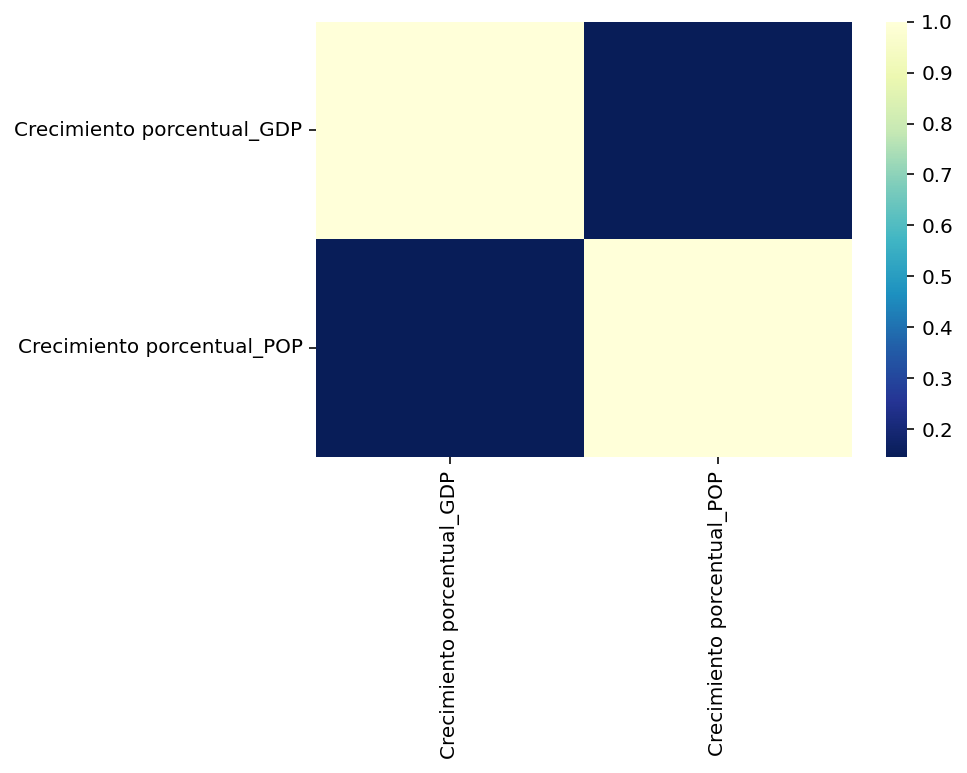

In [259]:
dataplot = sb.heatmap(corr_matrix, cmap="YlGnBu_r", annot=False)
mp.show()

In [128]:
#cambiar nombre de variable a numero, dummie variable
df_dummies=pd.get_dummies(df_merged)
df_dummies

,Crecimiento porcentual_GDP,Crecimiento porcentual_POP,Country Name_Albania,Country Name_Algeria,Country Name_Andorra,Country Name_Angola,Country Name_Antigua and Barbuda,Country Name_Arab World,Country Name_Argentina,Country Name_Armenia,...,Fecha_2010,Fecha_2011,Fecha_2012,Fecha_2013,Fecha_2014,Fecha_2015,Fecha_2016,Fecha_2017,Fecha_2018,Fecha_2019
0,3.054624,3.277204,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.950036,-0.637357,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.528362,1.572166,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.704940,2.152840,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.852704,5.510422,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2.561760,1.074675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4516,3.580626,0.491829,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,0.152583,1.338617,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4518,1.441785,2.892373,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Hasta aqui llegamos con el dataset, pero viendo la correlación de 0,14 consideramos que hacer una regresión de GDP en función de Población no sería apropiado

Parentesis al proyecto, lo siguiente es una Autoregresión, prediciendo valores futuros en función de si mismos, en este caso para el pais Aruba, como una prueba de concepto que sería posible hacerlo para todos, sin embargo, no nos parece la forma mas eficiente de encontrar los resultados que buscamos

In [156]:
df1_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [147]:
df_aruba=df1_clean.drop(range(1,67,1),axis=0)
df_aruba=df_aruba.drop(range(68,108,1),axis=0)
df_aruba=df_aruba.drop(range(109,264,1),axis=0)
df_aruba


,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.055027,2.22593,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,...,0.210709,0.370125,0.50243,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122


In [207]:
Aruba = pd.melt(df_aruba, var_name='Year', value_name='Crecimiento')
Aruba

,Year,Crecimiento
0,Country Name,Aruba
1,2000,2.055027
2,2001,2.22593
3,2002,2.229056
4,2003,2.109354
5,2004,1.757353
6,2005,1.302039
7,2006,0.799546
8,2007,0.384052
9,2008,0.134268


In [208]:
Aruba = Aruba.drop(0, axis=0)
Aruba

,Year,Crecimiento
1,2000,2.055027
2,2001,2.22593
3,2002,2.229056
4,2003,2.109354
5,2004,1.757353
6,2005,1.302039
7,2006,0.799546
8,2007,0.384052
9,2008,0.134268
10,2009,0.095655


In [211]:
Aruba['Year'] = Aruba['Year'].map(lambda x : int(x))
Aruba['Crecimiento'] = Aruba['Crecimiento'].map(lambda x : float(x))
Aruba

,Year,Crecimiento
1,2000,2.055027
2,2001,2.225930
3,2002,2.229056
4,2003,2.109354
5,2004,1.757353
6,2005,1.302039
7,2006,0.799546
8,2007,0.384052
9,2008,0.134268
10,2009,0.095655


In [212]:
Aruba.dtypes

Year             int64
Crecimiento    float64
dtype: object

<AxesSubplot:title={'center':'% Growth of Aruba'}, xlabel='Year', ylabel='% Growth'>

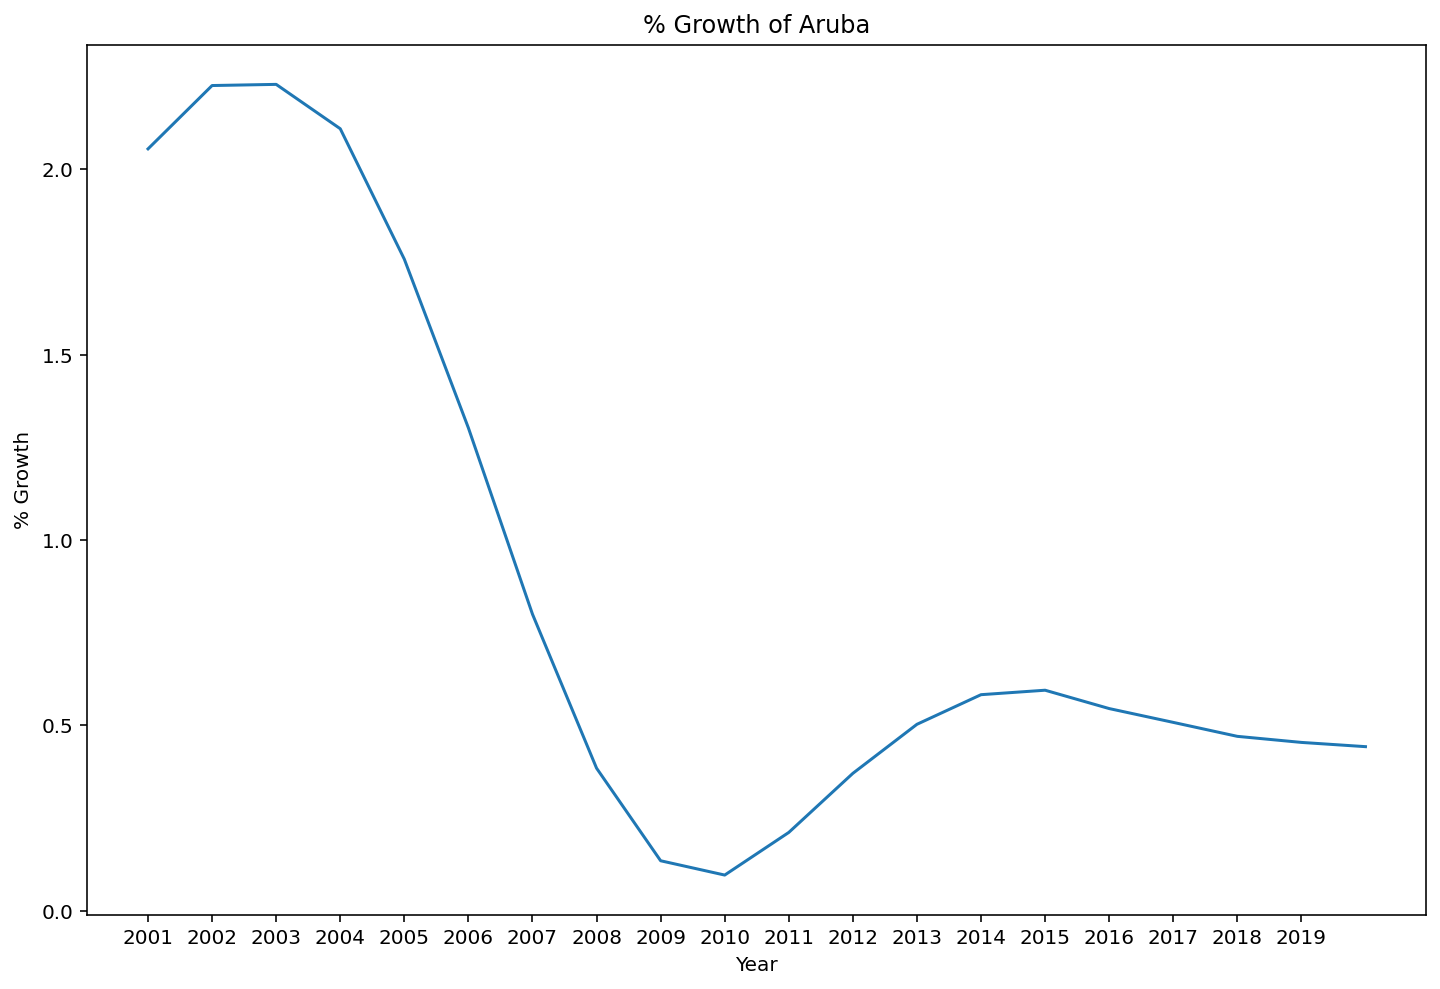

In [213]:
plt.figure(figsize=[12,8])
plt.title("% Growth of Aruba")
plt.xlabel("Year")
plt.ylabel("% Growth")
plt.xticks([i+1 for i in range(0,19)],labels = [2000 + i+1 for i in range(19)])
Aruba['Crecimiento'].plot()

In [214]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
train_data = Aruba['Crecimiento'][:round(len(Aruba['Crecimiento'])*0.8)]
test_data = Aruba['Crecimiento'][round(len(Aruba['Crecimiento'])*0.8):]

In [227]:
ar_model = AutoReg(train_data, lags=6).fit()

Text(0.5, 1.0, 'Prediccion del crecimiento de poblacion de Aruba del 2000 al 2035')

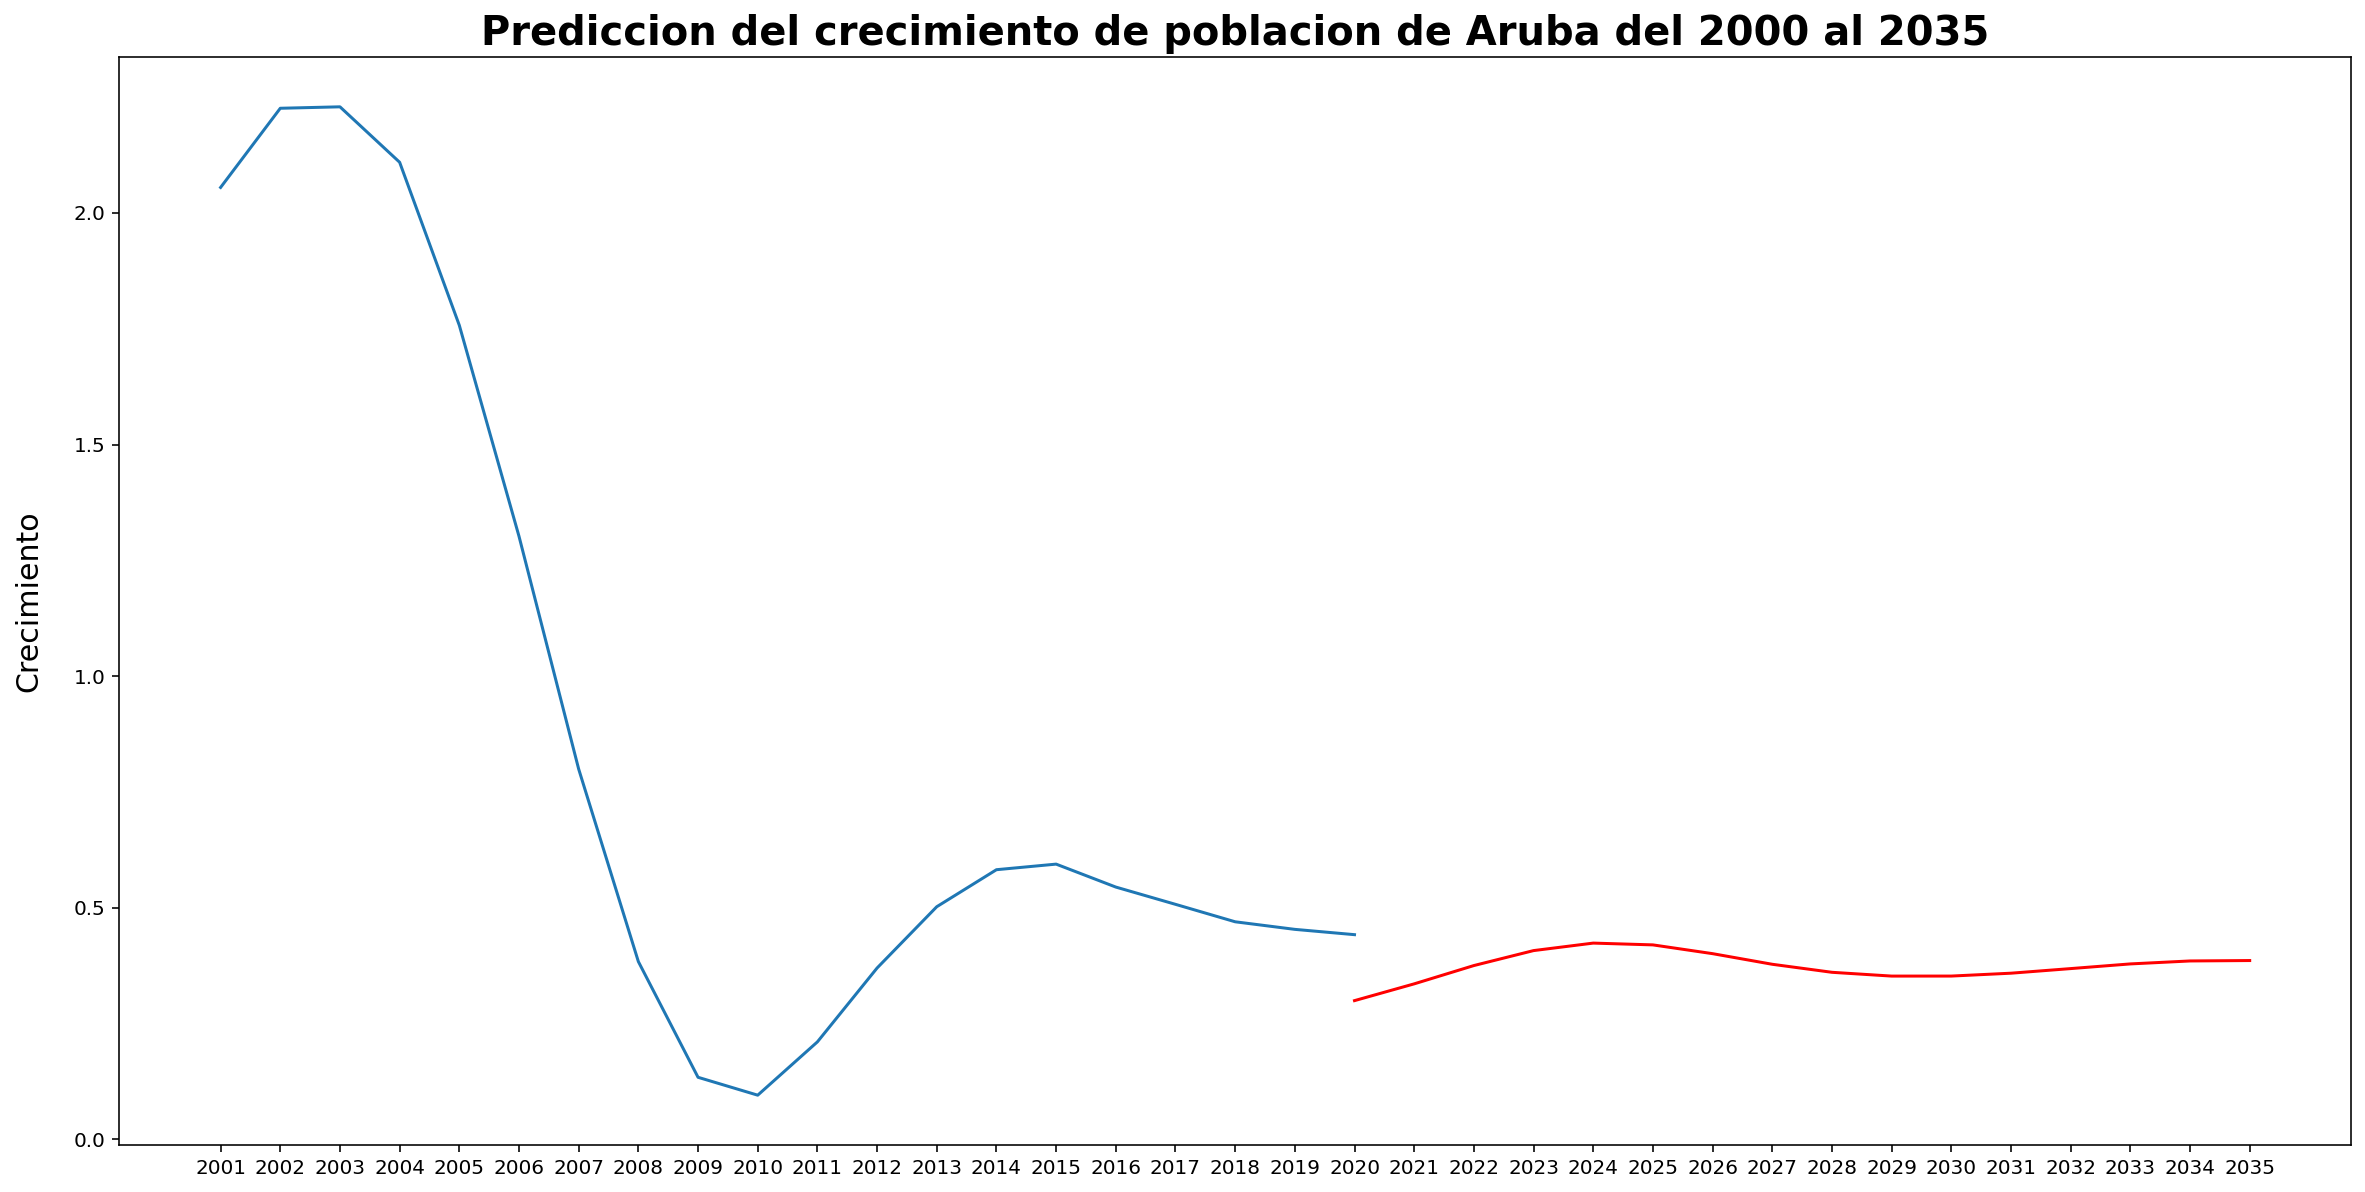

In [233]:
plt.figure(figsize=[20,10])
plt.plot(Aruba['Crecimiento'],label="% Growth")
pred = ar_model.predict(start=len(Aruba)-1, end=(len(Aruba)+15), dynamic=False)
plt.plot(pred,color='red',label="Forecast")
plt.xticks([i+1 for i in range(35)],labels = [2000 + i+1 for i in range(35)])
plt.ylabel("Crecimiento",fontsize=15,fontweight=550,labelpad=15)
plt.title("Prediccion del crecimiento de poblacion de Aruba del 2000 al 2035",fontsize=20,fontweight=600)

Continuamos con el proyecto, ahora vamos a tomar un approach un poco más estadistico, la idea general sería agrupar por pais y encontrar la media del crecimiento porcentual, aquellos con mayor crecimiento serían buenos candidatos para expandir la empresa. Tomamos crecimiento en GDP como "ventas" o el poder de compra de los individuos, y el crecimiento en poblacion como el crecimiento de clientes potenciales. Tener mas cantidad de clientes potenciales que a su vez tienen el dinero para poder realizar compras seria un pais ideal

In [260]:
df_merged

,Country Name,Fecha,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
0,Angola,2000,3.054624,3.277204
1,Albania,2000,6.950036,-0.637357
2,Andorra,2000,3.528362,1.572166
3,Arab World,2000,6.704940,2.152840
4,United Arab Emirates,2000,10.852704,5.510422
...,...,...,...,...
4515,World,2019,2.561760,1.074675
4516,Samoa,2019,3.580626,0.491829
4517,South Africa,2019,0.152583,1.338617
4518,Zambia,2019,1.441785,2.892373


In [312]:
df1_unmelted = df1_melted.pivot(index='Fecha', columns='Country Name')
df1_unmelted

Crecimiento porcentual                                     \
Country Name            Afghanistan   Albania   Algeria American Samoa   
Fecha                                                                    
2000                       2.975053 -0.637357  1.358408       1.337137   
2001                       3.902806 -0.938470  1.309843       1.157215   
2002                       4.496720 -0.299877  1.275066       0.996827   
2003                       4.668361 -0.374149  1.275915       0.715108   
2004                       4.321539 -0.417931  1.317846       0.297017   
2005                       3.682732 -0.511790  1.389901      -0.199592   
2006                       2.990478 -0.630911  1.471123      -0.766843   
2007                       2.493842 -0.755719  1.551383      -1.263297   
2008                       2.268277 -0.767343  1.636193      -1.507059   
2009                       2.397021 -0.673894  1.722093      -1.417147   
2010                       2.746576 -0.496462  1.805019      -1.071293   
2011                       3.143126 -0.269017  1.883314      -0.572258   
2012                       3.407587 -0.165151  1.951415      -0.165132   
2013                       3.494589 -0.183211  2.002728       0.082600   
2014                       3.355582 -0.207047  2.033592       0.139905   
2015                       3.077084 -0.291206  2.045387       0.037633   
2016                       2.778317 -0.159880  2.051355      -0.127294   
2017                       2.548347 -0.091972  2.044953      -0.217311   
2018                       2.384761 -0.246732  2.007374      -0.279066   
2019                       2.311817 -0.426007  1.933950      -0.276231   

                                                                           \
Country Name   Andorra    Angola Antigua and Barbuda Arab World Argentina   
Fecha                                                                       
2000          1.572166  3.277204            1.781187   2.152840  1.100584   
2001          2.939992  3.301198            1.561104   2.156237  1.092079   
2002          3.942573  3.329257            1.392886   2.161001  1.083551   
2003          4.375449  3.378811            1.275438   2.188472  1.071994   
2004          4.098923  3.453014            1.297971   2.241343  1.055389   
2005          3.382417  3.537557            1.395564   2.307180  1.036281   
2006          2.659984  3.619575            1.509449   2.377071  1.015442   
2007          2.066338  3.680635            1.585831   2.430732  0.998859   
2008          1.414648  3.710531            1.618470   2.453973  0.992593   
2009          0.714098  3.703878            1.567334   2.433025  0.999545   
2010         -0.016577  3.671462            1.467064   2.383187  0.752213   
2011         -0.834745  3.634159            1.382009   2.329922  1.153059   
2012         -1.588730  3.597774            1.286879   2.281329  1.136906   
2013         -2.025792  3.551950            1.217000   2.224341  1.119109   
2014         -1.951470  3.497493            1.136487   2.160102  1.099461   
2015         -1.529058  3.438851            1.078838   2.093418  1.078001   
2016         -0.919470  3.378273            1.021844   2.019087  1.057182   
2017         -0.383674  3.322081            0.946557   1.949024  1.037134   
2018          0.006493  3.276134            0.897185   1.915913  1.015808   
2019          0.176454  3.242983            0.860380   1.924693  0.993397   

                        ...                                               \
Country Name   Armenia  ... Uzbekistan   Vanuatu Venezuela, RB   Vietnam   
Fecha                   ...                                                
2000         -0.631021  ...   1.383747  2.024441      1.888574  1.100434   
2001         -0.617752  ...   1.265969  2.270061      1.859333  1.035891   
2002         -0.549218  ...   1.223832  2.454063      1.825033  0.976004   
2003         -0.530280  ...   1.163675  2.565307      1.781678  0.936613   
2004  

In [332]:
df2_unmelted = df2_melted.pivot(index='Fecha', columns='Country Name')
df2_unmelted

Crecimiento porcentual                                       \
Country Name Africa Eastern and Southern Africa Western and Central   Albania   
Fecha                                                                           
2000                            3.143734                   3.534805  6.950036   
2001                            3.470701                   5.443883  8.290070   
2002                            4.027575                   9.996154  4.539961   
2003                            2.950518                   5.732398  5.530051   
2004                            5.649875                   7.842013  5.509999   
2005                            6.570203                   5.887189  5.529915   
2006                            7.013670                   5.264617  5.900084   
2007                            7.371995                   5.596795  5.979982   
2008                            5.023262                   6.166092  7.499970   
2009                            1.495846                   6.245776  3.350067   
2010                            5.216511                   6.701194  3.706892   
2011                            4.420509                   4.934816  2.545322   
2012                            3.126902                   5.286321  1.417526   
2013                            4.846062                   6.019889  1.001987   
2014                            4.451771                   5.908563  1.774487   
2015                            3.025975                   2.832693  2.218752   
2016                            2.294711                   0.117369  3.314805   
2017                            3.111469                   2.278490  3.802197   
2018                            2.668322                   2.927756  4.071301   
2019                            2.050959                   3.198694  2.173692   

                                                                          \
Country Name Algeria   Andorra     Angola Antigua and Barbuda Arab World   
Fecha                                                                      
2000             3.8  3.528362   3.054624            6.203431   6.704940   
2001             3.0  8.119358   4.205999           -4.548003   1.644025   
2002             5.6  4.546362  13.665687            1.027442   0.528377   
2003             7.2  8.694204   2.989850            6.076544   4.729056   
2004             4.3  8.135676  10.952862            5.767029   9.074909   
2005             5.9  5.397796  15.028915            6.473831   5.456800   
2006             1.7  4.808689  11.547683           12.708149   6.165544   
2007             3.4  1.553188  14.010018            9.315383   4.635315   
2008             2.4 -5.559186  11.166138           -0.014341   5.900221   
2009             1.6 -5.302847   0.858713          -11.962697   0.707019   
2010             3.6 -1.974958   4.403933           -7.840595   4.775505   
2011             2.9 -0.008070   3.471976           -1.958613   3.926900   
2012             3.4 -4.974444   8.542188            3.372866   6.048721   
2013             2.8 -3.547597   4.954545           -0.600876   3.419453   
2014             3.8  2.504466   4.822628            3.795728   2.717669   
2015             3.7  1.434140   0.943572            3.825293   3.058921   
2016             3.2  3.709678  -2.580050            5.497788   3.260394   
2017             1.3  0.346072  -0.147213            3.144599   1.036327   
2018             1.2  1.588765  -2.003630            6.950417   2.216738   
2019             0.8  2.015548  -0.624644            3.351161   1.662008   

                                 ...                                    \
Country Name  Argentina Armenia  ... United States Upper middle income   
Fecha                            ...                                     
2000          -0.788999     5.9  ...      4.127484            6.360890   
2001          -4.408840     9.6  ...      0.998341            3.656421   
2002         -10.894485    13.2  ..

In [339]:
MeanValue1 = df1_unmelted.mean()
MeanValue1.head()

                        Country Name  
Crecimiento porcentual  Afghanistan       3.172231
                        Albania          -0.427206
                        Algeria           1.703343
                        American Samoa   -0.154954
                        Andorra           0.905001
dtype: float64

In [338]:
MeanValue2 = df2_unmelted.mean()
MeanValue2.head()

                        Country Name               
Crecimiento porcentual  Africa Eastern and Southern    4.096528
                        Africa Western and Central     5.095775
                        Albania                        4.255355
                        Algeria                        3.280000
                        Andorra                        1.750760
dtype: float64

In [351]:
Top25_POP = MeanValue1.nlargest(25).to_frame(name='crecimiento poblacion')
Top25_POP

crecimiento poblacion
                       Country Name                                   
Crecimiento porcentual Qatar                                  8.011341
                       United Arab Emirates                   5.960725
                       Bahrain                                4.735585
                       Equatorial Guinea                      4.231045
                       Oman                                   3.956576
                       Kuwait                                 3.840508
                       Niger                                  3.787047
                       Jordan                                 3.484665
                       Angola                                 3.480141
                       Turks and Caicos Islands               3.473728
                       Chad                                   3.415758
                       Maldives                               3.316366
                       Uganda                                 3.284376
                       Congo, Dem. Rep.                       3.183028
                       Afghanistan                            3.172231
                       South Sudan                            3.114237
                       Mali                                   3.067948
                       Burundi                                3.048425
                       Gambia, The                            3.044105
                       Lebanon                                3.019612
                       Liberia                                3.018443
                       Gabon                                  2.971918
                       Somalia                                2.953987
                       Burkina Faso                           2.942014
                       Pre-demographic dividend               2.877491

In [353]:
Top25_GDP = MeanValue2.nlargest(25).to_frame(name='crecimiento gdp')
Top25_GDP

crecimiento gdp
                       Country Name                                                
Crecimiento porcentual Myanmar                                             9.526709
                       China                                               9.014303
                       Ethiopia                                            8.939400
                       Equatorial Guinea                                   8.913685
                       Azerbaijan                                          8.696640
                       East Asia & Pacific (IDA & IBRD countries)          8.183078
                       East Asia & Pacific (excluding high income)         8.182596
                       Turkmenistan                                        8.070298
                       Rwanda                                              7.750547
                       Cambodia                                            7.742202
                       Tajikistan                                          7.690258
                       Macao SAR, China                                    7.638201
                       Lao PDR                                             7.083251
                       Bhutan                                              7.080406
                       Mongolia                                            6.847617
                       Armenia                                             6.575000
                       Uzbekistan                                          6.568922
                       Mozambique                                          6.531240
                       Kazakhstan                                          6.525000
                       Chad                                                6.520180
                       Vietnam                                             6.478145
                       India                                               6.472996
                       Late-demographic dividend                           6.377279
                       Tanzania                                            6.333332
                       Uganda                                              6.284131

Tenemos dos dataframes, uno con los 25 paises con mayor crecimiento poblacional, y otro con los 25 paises con mayor crecimiento de GDP, al realizar un inner join, nos quedamos solo con los paises que estaban en ambas listas, es decir, alto crecimiento en ambos criterios.

In [354]:
Results = pd.merge(Top25_GDP, Top25_POP, on='Country Name')
Results

,crecimiento gdp,crecimiento poblacion
Country Name,,
Equatorial Guinea,8.913685,4.231045
Chad,6.520180,3.415758
Uganda,6.284131,3.284376


Con estos resultados es que recomendariamos a una empresa poner nuevas sedes en cualquiera de estos 3 paises